In [311]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import time

In [2]:
import FinanceDataReader as fdr

# 한국 전체 : df_krx

In [28]:
df_krx = fdr.StockListing('KRX')
df_krx.head()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,"박대현, 손삼달",http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도


# 코스닥종목: df_kq

In [26]:
df_kq = df_krx[df_krx['Market']=='KOSDAQ']
df_kq

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도
5,211270,KOSDAQ,AP위성,통신 및 방송 장비 제조업,위성통신 단말기,2016-03-04,12월,류장수,http://www.apsi.co.kr,서울특별시
53,032790,KOSDAQ,BNGT,기계장비 및 관련 물품 도매업,"Bio 이종장기 사업, ICT 프린터 현상기",1997-06-26,12월,조상환,http://www.mgenplus.com,서울특별시
...,...,...,...,...,...,...,...,...,...,...
8045,024060,KOSDAQ,흥구석유,기타 전문 도매업,휘발유등,1994-12-07,12월,김상우,NaN,대구광역시
8046,010240,KOSDAQ,흥국,특수 목적용 기계 제조업,굴삭기 Roller 및 형단조품,2009-05-12,12월,류명준,http://www.heungkuk.co.kr,충청남도
8047,189980,KOSDAQ,흥국에프엔비,비알코올음료 및 얼음 제조업,"과일음료(에이드베이스, 스무디, 착즙쥬스 등)",2015-08-07,12월,"박철범, 오길영",http://www.hyungkuk.com,서울특별시
8052,037440,KOSDAQ,희림,"건축기술, 엔지니어링 및 관련 기술 서비스업",설계 및 감리용역,2000-02-03,12월,"정영균, 이목운, 허철호 (각자대표)",http://www.heerim.com,서울특별시


## 코스닥 종목 종목코드: st_code

In [97]:
st_code = df_kq['Symbol']
st_code[:5]

0     060310
3     054620
4     265520
5     211270
53    032790
Name: Symbol, dtype: object

In [135]:
'208640' in st_code

False

In [94]:
st_name = df_kq['Name']
st_name[:5]

0         3S
3     APS홀딩스
4      AP시스템
5       AP위성
53      BNGT
Name: Name, dtype: object

In [506]:
'코이즈' in st_name

False

# 네이버 증권 살펴보기

In [304]:
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

In [116]:
url = 'https://finance.naver.com/item/coinfo.naver?code=208640'

In [117]:
res = requests.get(url)
res

<Response [200]>

In [124]:
# iframe url
url = 'https://navercomp.wisereport.co.kr/v2/company/c1010001.aspx?cmp_cd=208640'

In [125]:
driver = webdriver.Chrome()
driver.get(url)

In [126]:
html = driver.page_source
html

'<html lang="ko" style="" class=" js flexbox flexboxlegacy canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface generatedcontent video audio localstorage sessionstorage webworkers no-applicationcache svg inlinesvg smil svgclippaths"><head>\n\t<title>온라인기업정보 - 기업모니터 - 기업개요(썸에이지)</title>\n\t<link rel="shortcut icon" href="/favicon.ico">\n\t<meta http-equiv="X-UA-Compatible" content="IE=edge">\n\t<script type="text/javascript" async="" src="https://www.google-analytics.com/analytics.js"></script><script language="javascript" src="/include/domain.js" type="text/javascript"></script>\n\t<!--[if (!IE) | (gt IE 8)]>\n    \t<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1, user-scalable=no" />\n

In [127]:
df = pd.read_html(html)

## df[1]: 시가총액

In [128]:
df[1]

,0,1
0,주가/전일대비/수익률,"1,380원 / -85원 / -5.80%"
1,52Weeks 최고/최저,"3,880원 / 1,365원"
2,액면가,100원
3,거래량/거래대금,"829,584주 / 12억원"
4,시가총액,"1,921억원"
5,52주베타,0.45
6,발행주식수/유동비율,"139,229,292주 / 63.95%"
7,외국인지분율,0.47%
8,수익률 (1M/3M/6M/1Y),-33.17%/ -32.85%/ -47.03%/ -46.92%


In [123]:
df[1].iloc[4,1]

'3,969,905억원'

## df[5]: 주요주주

In [80]:
df[5]

,주요주주,보유주식수(보통),보유지분(%)
0,삼성생명보험 외 16인 삼성생명보험 외 16인,1.241202e+09,20.79
1,국민연금공단,5.185096e+08,8.69
2,BlackRock Fund Advisors 외 15인 BlackRock Fund A...,3.003911e+08,5.03
3,NaN,NaN,NaN


## df[13] or df[12] : 주요재무정보

In [88]:
df[13]

주요재무정보        연간연간컨센서스보기                                      \
        주요재무정보 2019/12  (IFRS연결) 2020/12  (IFRS연결) 2021/12  (IFRS연결)   
0          매출액      2.304009e+06      2.368070e+06      2.796048e+06   
1         영업이익      2.776850e+05      3.599390e+05      5.163390e+05   
2   영업이익(발표기준)      2.776850e+05      3.599390e+05      5.163390e+05   
3     세전계속사업이익      3.043220e+05      3.634510e+05      5.335180e+05   
4        당기순이익      2.173890e+05      2.640780e+05      3.990740e+05   
5    당기순이익(지배)      2.150510e+05      2.609080e+05      3.924380e+05   
6   당기순이익(비지배)      2.338000e+03      3.170000e+03      6.637000e+03   
7         자산총계      3.525645e+06      3.782357e+06      4.266212e+06   
8         부채총계      8.968410e+05      1.022877e+06      1.217212e+06   
9         자본총계      2.628804e+06      2.759480e+06      3.048999e+06   
10    자본총계(지배)      2.549155e+06      2.676703e+06      2.962377e+06   
11   자본총계(비지배)      7.964900e+04      8.277700e+04      8.662200e+04   
12         자본금      8.975000e+03      8.975000e+03      8.975000e+03   
13    영업활동현금흐름      4.538290e+05      6.528700e+05      6.510540e+05   
14    투자활동현금흐름     -3.994820e+05     -5.362860e+05     -3.304780e+05   
15    재무활동현금흐름     -9.484500e+04     -8.327800e+04     -2.399100e+05   
16       CAPEX      2.536780e+05      3.759200e+05      4.712210e+05   
17         FCF      2.001520e+05      2.769500e+05      1.798330e+05   
18      이자발생부채      1.841200e+05      2.021740e+05      1.839210e+05   
19       영업이익률      1.205000e+01      1.520000e+01      1.847000e+01   
20        순이익률      9.440000e+00      1.115000e+01      1.427000e+01   
21      ROE(%)      8.690000e+00      9.980000e+00      1.392000e+01   
22      ROA(%)      6.280000e+00      7.230000e+00      9.920000e+00   
23        부채비율      3.412000e+01      3.707000e+01      3.992000e+01   
24       자본유보율      2.885602e+04      3.069279e+04      3.314362e+04   
25      EPS(원)      3.166000e+03      3.841000e+03      5.777000e+03   
26      PER(배)      1.763000e+01      2.109000e+01      1.355000e+01   
27      BPS(원)      3.752800e+04      3.940600e+04      4.361100e+04   
28      PBR(배)      1.490000e+00      2.060000e+00      1.800000e+00   
29    현금DPS(원)      1.416000e+03      2.994000e+03      1.444000e+03   
30     현금배당수익률      2.540000e+00      3.700000e+00      1.840000e+00   
31   현금배당성향(%)      4.473000e+01      7.795000e+01      2.500000e+01   
32  발행주식수(보통주)      5.969783e+09      5.969783e+09      5.969783e+09   

                               분기분기컨센서스보기                                      \
   2022/12(E)  (IFRS연결) 2021/06  (IFRS연결) 2021/09  (IFRS연결) 2021/12  (IFRS연결)   
0            3260148.00      6.367160e+05      7.397920e+05      7.656550e+05   
1             631735.00      1.256670e+05      1.581750e+05      1.386670e+05   
2                   NaN      1.256670e+05      1.581750e+05      1.386670e+05   
3             652593.00      1.288240e+05      1.635590e+05      1.436290e+05   
4             485565.00      9.634500e+04      1.229330e+05      1.083790e+05   
5             477522.00      9.450700e+04      1.205720e+05      1.064310e+05   
6                   NaN      1.838000e+03      2.361000e+03      1.948000e+03   
7            4711683.00      3.847777e+06      4.104207e+06      4.266212e+06   
8            1271108.00      1.024534e+06      1.136546e+06      1.217212e+06   
9            3440575.00      2.823243e+06      2.967661e+06      3.048999e+06   
10           3349668.00      2.741605e+06      2.883312e+06      2.962377e+06   
11                  NaN      8.163700e+04      8.434900e+04      8.662200e+04   
12              8979.00      8.975000e+03      8.975000e+03      8.975000e+03   
13            812740.00      1.208650e+05      1.858150e+05      2.063450e+05   
14           -580245.00     -4.169300e+04     -1.694950e+05     -1.035130e+05   
15           -116215.00     -1.904860e+05     -5.478000e+03     -3.800300e+04   
16            480044.00      

# 코스닥 종목 시가총액 크롤링: df_mc

In [98]:
len(st_code)

1574

In [99]:
len(st_name)

1574

In [ ]:
url = 'https://navercomp.wisereport.co.kr/v2/company/c1010001.aspx?cmp_cd=060310'

In [148]:
code_list = st_code
name_list = st_name

driver = webdriver.Chrome()

company_code=[]

mc_list = []
for code in code_list:
    print(code)
    url = 'https://navercomp.wisereport.co.kr/v2/company/c1010001.aspx?cmp_cd={}'.format(code)
    driver.get(url)
    driver.implicitly_wait(10)
    try:
        html = driver.page_source
        #시가총액
        df = pd.read_html(html)
        
        mc = df[1].iloc[4,1]
        mc = re.sub('[^0-9]','',mc)
        mc_list.append(mc)
        company_code.append(code)
        
    except:
        pass


060310
054620
265520
211270
032790
013720
035760
311690
051500
058820
023460
056730
065770
083660
404950
367340
367360
068790
241520
245620
037370
050120
084180
214270
130500
900290
083450
297890
078150
195940
028300
067630
047920
115450
036640
335870
351340
388790
405350
095340
099520
950170
067290
035900
318000
024840
024120
021320
036670
044180
151860
046440
035600
226360
111870
060720
122450
052900
058400
114450
060370
108320
160550
053290
104200
060250
030190
024940
218410
327260
091340
019550
950110
046140
151910
036120
099220
036540
255220
040610
049470
184230
016250
337450
340350
048550
063440
950180
289080
089230
161570
192410
032540
022220
048770
246690
317240
038340
073570
057030
040300
051390
052220
079940
078890
036620
217730
114190
094480
039240
053950
011040
024910
198440
049720
014570
348150
098460
035290
038530
900280
215000
121440
366030
014200
029480
026910
355150
397880
331520
053270
066620
043650
006050
060480
078130
307750
035080
204020
186230
900070
204620
019660

052670
199820
038010
276730
080220
216080
229000
082270
064800
044060
034940
067000
033340
036930
239340
051980
072020
000440
078650
228760
314130
389030
043610
263860
303030
036180
208350
144510
382480
382800
051160
053050
119850
270520
065060
204840
311320
388050
219750
018120
109820
086060
036890
363250
007370
085660
261780
158310
094850
004650
278280
066360
047820
052300
094360
016920
284620
293490
042000
317530
071850
050110
223310
900310
078340
063080
307930
079190
263700
214370
221980
330990
342550
192250
115500
089150
025880
093320
073010
105330
272110
039420
083550
032500
225430
102370
036030
064820
347140
256940
024880
042040
04204217
054410
258610
274090
217600
089010
220260
052400
046070
047770
078940
080530
224060
104540
027050
290510
190650
101670
123410
036690
049430
183300
041960
089890
009730
082660
222040
241710
069110
166480
045970
196450
029960
102940
950160
056000
033290
056360
282880
121850
1218501C
015710
052330
322780
126600
200130
294570
317690
365270
060280
04

In [446]:
df_mc = pd.DataFrame({'회사코드': company_code, '시가총액':mc_list})
df_mc.to_csv('./data/코스닥시가총액.csv')

In [445]:
df_mc

,회사코드,시가총액
0,060310,1460
1,054620,2559
2,265520,3538
3,211270,2345
4,032790,1204
...,...,...
1553,024060,1233
1554,010240,1004
1555,189980,1616
1556,037440,1192


In [500]:
df_mc['시가총액'] = pd.to_numeric(df_mc['시가총액'])

## 시가총액 500억 이하: df_mc500

In [641]:
df_mc500 = df_mc[df_mc['시가총액'] <=500]
df_mc500

,회사코드,시가총액
14,404950,128
15,367340,132
16,367360,107
35,335870,76
36,351340,123
...,...,...
1489,050540,42
1499,070590,377
1514,386580,98
1520,900270,306


In [649]:
name_mc500 = []
for code in df_mc500['회사코드']:
    name = df_kq[df_kq['Symbol']== code]['Name'].iloc[0]
    name_mc500.append(name)
name_mc500

['DB금융스팩10호',
 'DB금융스팩8호',
 'DB금융스팩9호',
 'IBKS제12호스팩',
 'IBKS제13호스팩',
 'IBKS제16호스팩',
 'IBKS제17호스팩',
 'ITX-AI',
 'KD',
 'SK5호스팩',
 'SK6호스팩',
 'THE MIDONG',
 'UCI',
 'YW',
 '광진실업',
 '교보10호스팩',
 '교보11호스팩',
 '교보9호스팩',
 '국일신동',
 '글로벌에스엠',
 '나노',
 '나노캠텍',
 '뉴보텍',
 '대동금속',
 '대신밸런스제10호스팩',
 '대신밸런스제11호스팩',
 '대신밸런스제8호스팩',
 '동일기연',
 '듀오백',
 '디에스앤엘',
 '디와이씨',
 '디젠스',
 '디지아이',
 '디지캡',
 '마이더스AI',
 '매직마이크로',
 '미래에셋대우스팩 5호',
 '미래에셋대우스팩3호',
 '미래에셋비전스팩1호',
 '베스파',
 '비디아이',
 '빛샘전자',
 '삼성머스트스팩5호',
 '삼성스팩4호',
 '삼일',
 '상상인제3호스팩',
 '세동',
 '세영디앤씨',
 '세진티에스',
 '소리바다',
 '솔고바이오',
 '솔루에타',
 '스카이문스테크놀로지',
 '스카이이앤엠',
 '스타플렉스',
 '신라에스지',
 '신영스팩5호',
 '신영스팩6호',
 '신영스팩7호',
 '신한제6호스팩',
 '신한제7호스팩',
 '신한제8호스팩',
 '신한제9호스팩',
 '신화콘텍',
 '씨씨에스',
 '씨케이에이치',
 '아리온',
 '아우딘퓨쳐스',
 '알에프세미',
 '에스디시스템',
 '에스앤더블류',
 '에스에스알',
 '에스엘바이오닉스',
 '에스케이증권7호스팩',
 '에스티오',
 '에이디칩스',
 '에이치엠씨제4호스팩',
 '에이치엠씨제5호스팩',
 '에이치케이',
 '에프알텍',
 '에프앤리퍼블릭',
 '엑사이엔씨',
 '엑스큐어',
 '엔시트론',
 '엔에이치스팩18호',
 '엔에이치스팩21호',
 '엔에이치스팩22호',
 '엔지스테크널러지',
 '엔피케이',
 '엘디티',
 '엘아이에

## 시가총액 1000억 이하 : df_mc1000

In [659]:
df_mc1000 = df_mc[df_mc['시가총액'] <=1000]
df_mc1000

,회사코드,시가총액
10,023460,867
12,065770,527
13,083660,801
14,404950,128
15,367340,132
...,...,...
1539,290270,584
1540,353190,708
1544,028080,580
1545,032860,653


In [660]:
name_mc1000 = []
for code in df_mc1000['회사코드']:
    name = df_kq[df_kq['Symbol']== code]['Name'].iloc[0]
    name_mc1000.append(name)
name_mc1000

['CNH',
 'CS',
 'CSA 코스믹',
 'DB금융스팩10호',
 'DB금융스팩8호',
 'DB금융스팩9호',
 'ES큐브',
 'EV수성',
 'GH신소재',
 'GRT',
 'IBKS제12호스팩',
 'IBKS제13호스팩',
 'IBKS제16호스팩',
 'IBKS제17호스팩',
 'ITX-AI',
 'KBG',
 'KBI메탈',
 'KB오토시스',
 'KD',
 'KH 건설',
 'KH 전자',
 'KMH하이텍',
 'KPX생명과학',
 'PN풍년',
 'S&K폴리텍',
 'SG',
 'SG&G',
 'SGA',
 'SGA솔루션즈',
 'SK5호스팩',
 'SK6호스팩',
 'THE MIDONG',
 'TJ미디어',
 'TPC',
 'UCI',
 'YBM넷',
 'YW',
 'iMBC',
 '강원에너지',
 '경남제약',
 '경창산업',
 '고려제약',
 '골드퍼시픽',
 '골든센츄리',
 '광무',
 '광진실업',
 '교보10호스팩',
 '교보11호스팩',
 '교보9호스팩',
 '국영지앤엠',
 '국일신동',
 '그리티',
 '글로벌에스엠',
 '기산텔레콤',
 '까스텔바작',
 '나노',
 '나노브릭',
 '나노캠텍',
 '나무기술',
 '나우IB',
 '네오리진',
 '네오오토',
 '네오티스',
 '네오펙트',
 '네이블',
 '넥스트아이',
 '노블엠앤비',
 '노을',
 '누리플랜',
 '누리플렉스',
 '뉴로스',
 '뉴보텍',
 '다믈멀티미디어',
 '다보링크',
 '대동금속',
 '대동스틸',
 '대륙제관',
 '대림제지',
 '대모',
 '대성미생물',
 '대성엘텍',
 '대성파인텍',
 '대신밸런스제10호스팩',
 '대신밸런스제11호스팩',
 '대신밸런스제8호스팩',
 '대신정보통신',
 '대양제지',
 '대유에이피',
 '대창솔루션',
 '대창스틸',
 '대한과학',
 '대호특수강',
 '대호특수강우',
 '더블유에스아이',
 '동국알앤에스',
 '동방선기',
 '동아엘텍',
 '동양에스텍',
 '동양파일',
 '동우팜투테이블

## 적자기업 찾기

In [533]:
earning19 = []
earning20 = []
earning21 = []
code_list = []

for code in df_mc500['회사코드']:
    
    code_list.append(code)
    # iframe url
    url = 'https://navercomp.wisereport.co.kr/v2/company/c1010001.aspx?cmp_cd={}'.format(code)
    driver = webdriver.Chrome()
    driver.get(url)
    time.sleep(0.5)
    html = driver.page_source
    df = pd.read_html(html)[12]
    earning19.append(df.iloc[1,1])
    earning20.append(df.iloc[1,2])
    earning21.append(df.iloc[1,3])



In [535]:
df_earning = pd.DataFrame({'회사코드': code_list, '2019년영업이익':earning19, '2020년영업이익':earning20, '2021년영업이익':earning21 })
df_earning

,회사코드,2019년영업이익,2020년영업이익,2021년영업이익
0,404950,NaN,NaN,0.0
1,367340,NaN,0.0,0.0
2,367360,NaN,0.0,0.0
3,335870,0.0,-1.0,-1.0
4,351340,NaN,0.0,0.0
...,...,...,...,...
164,050540,-123.0,-7.0,11.0
165,070590,-10.0,-55.0,-2.0
166,386580,NaN,NaN,0.0
167,900270,345.0,439.0,50.0


In [538]:
df_minus = df_earning[(df_earning['2019년영업이익']<0) & (df_earning['2020년영업이익']<0) & (df_earning['2021년영업이익']<0)]
df_minus

,회사코드,2019년영업이익,2020년영업이익,2021년영업이익
7,099520,-29.0,-20.0,-69.0
11,161570,-36.0,-43.0,-31.0
12,038340,-50.0,-131.0,-36.0
17,331520,-1.0,-1.0,-1.0
29,141020,-160.0,-1.0,-50.0
34,222810,-50.0,-61.0,-40.0
39,299910,-87.0,-339.0,-441.0
47,052190,-91.0,-47.0,-9.0
49,053110,-75.0,-94.0,-37.0
53,131100,-27.0,-149.0,-119.0


# 전환사채 유상증자 크롤링

In [255]:
url = 'https://kind.krx.co.kr/corpgeneral/stockissuelist.do?method=loadInitPage'

In [256]:
driver = webdriver.Chrome()
driver.get(url)
# 코스닥 클릭
driver.find_element_by_css_selector('#rKosdaq').click()

C:\Users\bitcamp\AppData\Local\Temp/ipykernel_16504/241063523.py:4: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_css_selector('#rKosdaq').click()


In [257]:
# 기간 : 전체 클릭
driver.find_element_by_css_selector('#search-btn-dates > ul > li:nth-child(8) > a').click()

C:\Users\bitcamp\AppData\Local\Temp/ipykernel_16504/2252389404.py:2: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_css_selector('#search-btn-dates > ul > li:nth-child(8) > a').click()


In [258]:
# 검색 클릭
driver.find_element_by_css_selector('#searchForm > section > div > div.btn-group.type-bt > a.btn-sprite.type-00.vmiddle.search-btn').click()

C:\Users\bitcamp\AppData\Local\Temp/ipykernel_16504/2653651923.py:2: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_css_selector('#searchForm > section > div > div.btn-group.type-bt > a.btn-sprite.type-00.vmiddle.search-btn').click()


In [259]:
# 테이블 가져오기
html = driver.page_source
df = pd.read_html(html)
df[1]

,회사명,상장(예정)일,상장방식,발행주식수,액면가,발행사유
0,광림,2022-05-06,추가상장,1432024,500,국내사모 전환사채 전환
1,바이온,2022-05-06,변경상장,-33450389,500,감자(무상)
2,초록뱀미디어,2022-05-06,추가상장,100000,500,주식매수선택권행사
3,트루윈,2022-05-06,추가상장,22428,500,국내공모 신주인수권부사채 신주인수권 행사
4,로보티즈,2022-05-06,추가상장,10000,500,주식매수선택권행사
5,뉴로스,2022-05-06,추가상장,1,500,국내공모 신주인수권부사채 신주인수권 행사
6,옵티팜,2022-05-06,추가상장,80500,500,주식매수선택권행사
7,EDGC,2022-05-06,추가상장,20000,100,주식매수선택권행사
8,유틸렉스,2022-05-06,추가상장,16500,500,주식매수선택권행사
9,카카오게임즈,2022-05-06,추가상장,26135,100,주식매수선택권행사


In [367]:
# page bar
buttons = driver.find_elements_by_css_selector('#main-contents > section.paging-group > div.paging.type-00>a')
buttons

C:\Users\bitcamp\AppData\Local\Temp/ipykernel_16504/1254523503.py:2: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  buttons = driver.find_elements_by_css_selector('#main-contents > section.paging-group > div.paging.type-00>a')


[<selenium.webdriver.remote.webelement.WebElement (session="ceb6e202f7cffa233ab438484607d82b", element="cc9aee1d-8f75-4f0e-8b28-0341a889592d")>,
 <selenium.webdriver.remote.webelement.WebElement (session="ceb6e202f7cffa233ab438484607d82b", element="330683c3-eebe-4675-96a4-5db74239b273")>,
 <selenium.webdriver.remote.webelement.WebElement (session="ceb6e202f7cffa233ab438484607d82b", element="f9d90660-e4d1-424a-a2f4-fd062e84310d")>,
 <selenium.webdriver.remote.webelement.WebElement (session="ceb6e202f7cffa233ab438484607d82b", element="5e568944-afe4-40f7-b37e-748d0835dd44")>,
 <selenium.webdriver.remote.webelement.WebElement (session="ceb6e202f7cffa233ab438484607d82b", element="731304c7-6832-4a1b-8889-2f5587c6f59f")>,
 <selenium.webdriver.remote.webelement.WebElement (session="ceb6e202f7cffa233ab438484607d82b", element="1bd2fa4c-1b1d-483b-aa0a-a81b6dea32d6")>,
 <selenium.webdriver.remote.webelement.WebElement (session="ceb6e202f7cffa233ab438484607d82b", element="41d727ff-f249-406e-95b8-68

In [368]:
buttons[2].text

'1'

In [ ]:
str(page+1) == button.text

In [319]:
len(buttons)

14

In [320]:
buttons[page+1].click()

## 연습

In [428]:
page_num = 5
df = pd.DataFrame()

url = 'https://kind.krx.co.kr/corpgeneral/stockissuelist.do?method=loadInitPage'
driver = webdriver.Chrome()
driver.get(url)
# 코스닥 클릭
driver.find_element_by_css_selector('#rKosdaq').click()
# 기간 : 전체 클릭
driver.find_element_by_css_selector('#search-btn-dates > ul > li:nth-child(8) > a').click()
# 검색 클릭
driver.find_element_by_css_selector('#searchForm > section > div > div.btn-group.type-bt > a.btn-sprite.type-00.vmiddle.search-btn').click()
time.sleep(0.5)

C:\Users\bitcamp\AppData\Local\Temp/ipykernel_16504/1627817576.py:8: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_css_selector('#rKosdaq').click()
C:\Users\bitcamp\AppData\Local\Temp/ipykernel_16504/1627817576.py:10: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_css_selector('#search-btn-dates > ul > li:nth-child(8) > a').click()
C:\Users\bitcamp\AppData\Local\Temp/ipykernel_16504/1627817576.py:12: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_css_selector('#searchForm > section > div > div.btn-group.type-bt > a.btn-sprite.type-00.vmiddle.search-btn').click()


In [430]:
df = pd.DataFrame()
for page in range(1,3):
    print('page: ',page)
    
    #page bar
    page_bar = driver.find_elements_by_css_selector('#main-contents > section.paging-group > div.paging.type-00 >a')
    time.sleep(2)
    
    for button in page_bar:
        
        if str(page) == button.text:
            print('page문자열: ',str(page))
            button.click()
            time.sleep(2)
            break
        
    html = driver.page_source
    df1 = pd.read_html(html)[1]
    df = pd.concat([df,df1])

df

page:  1


C:\Users\bitcamp\AppData\Local\Temp/ipykernel_16504/1871435308.py:6: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  page_bar = driver.find_elements_by_css_selector('#main-contents > section.paging-group > div.paging.type-00 >a')


page문자열:  1
page:  2
page문자열:  2


,회사명,상장(예정)일,상장방식,발행주식수,액면가,발행사유
0,광림,2022-05-06,추가상장,1432024,500,국내사모 전환사채 전환
1,바이온,2022-05-06,변경상장,-33450389,500,감자(무상)
2,초록뱀미디어,2022-05-06,추가상장,100000,500,주식매수선택권행사
3,트루윈,2022-05-06,추가상장,22428,500,국내공모 신주인수권부사채 신주인수권 행사
4,로보티즈,2022-05-06,추가상장,10000,500,주식매수선택권행사
5,뉴로스,2022-05-06,추가상장,1,500,국내공모 신주인수권부사채 신주인수권 행사
6,옵티팜,2022-05-06,추가상장,80500,500,주식매수선택권행사
7,EDGC,2022-05-06,추가상장,20000,100,주식매수선택권행사
8,유틸렉스,2022-05-06,추가상장,16500,500,주식매수선택권행사
9,카카오게임즈,2022-05-06,추가상장,26135,100,주식매수선택권행사


## 합친코드

In [441]:
page_num = 1796
df = pd.DataFrame()

url = 'https://kind.krx.co.kr/corpgeneral/stockissuelist.do?method=loadInitPage'
driver = webdriver.Chrome()
driver.get(url)
# 코스닥 클릭
driver.find_element_by_css_selector('#rKosdaq').click()
# 기간 : 전체 클릭
driver.find_element_by_css_selector('#search-btn-dates > ul > li:nth-child(8) > a').click()
# 검색 클릭
driver.find_element_by_css_selector('#searchForm > section > div > div.btn-group.type-bt > a.btn-sprite.type-00.vmiddle.search-btn').click()
time.sleep(1)

df = pd.DataFrame()
for page in range(1,page_num+1):
    print('page: ',page)
    
    #page bar
    page_bar = driver.find_elements_by_css_selector('#main-contents > section.paging-group > div.paging.type-00 >a')
    
    
    for button in page_bar:
        
        if str(page) == button.text:
            print('page문자열: ',str(page))
            button.click()
            time.sleep(3)
            break
        
    html = driver.page_source
    df1 = pd.read_html(html)[1]
    df = pd.concat([df,df1])
    print(df.iloc[-1,1])
    
    # 다음페이지 넘기기
    if page%10==0:
        driver.find_element_by_css_selector('#main-contents > section.paging-group > div.paging.type-00 > a.next').click()
        time.sleep(3)

df.to_csv('./data/전환사채.csv')
df

C:\Users\bitcamp\AppData\Local\Temp/ipykernel_16504/1046955970.py:8: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_css_selector('#rKosdaq').click()
C:\Users\bitcamp\AppData\Local\Temp/ipykernel_16504/1046955970.py:10: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_css_selector('#search-btn-dates > ul > li:nth-child(8) > a').click()
C:\Users\bitcamp\AppData\Local\Temp/ipykernel_16504/1046955970.py:12: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_css_selector('#searchForm > section > div > div.btn-group.type-bt > a.btn-sprite.type-00.vmiddle.search-btn').click()


page:  1


C:\Users\bitcamp\AppData\Local\Temp/ipykernel_16504/1046955970.py:20: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  page_bar = driver.find_elements_by_css_selector('#main-contents > section.paging-group > div.paging.type-00 >a')


page문자열:  1
2022-05-04
page:  2
page문자열:  2
2022-05-03
page:  3
page문자열:  3
2022-05-02
page:  4
page문자열:  4
2022-04-29
page:  5
page문자열:  5
2022-04-28
page:  6
page문자열:  6
2022-04-27
page:  7
page문자열:  7
2022-04-26
page:  8
page문자열:  8
2022-04-25
page:  9
page문자열:  9
2022-04-25
page:  10
page문자열:  10
2022-04-22


C:\Users\bitcamp\AppData\Local\Temp/ipykernel_16504/1046955970.py:38: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_css_selector('#main-contents > section.paging-group > div.paging.type-00 > a.next').click()


page:  11
page문자열:  11
2022-04-21
page:  12
page문자열:  12
2022-04-20
page:  13
page문자열:  13
2022-04-20
page:  14
page문자열:  14
2022-04-18
page:  15
page문자열:  15
2022-04-18
page:  16
page문자열:  16
2022-04-15
page:  17
page문자열:  17
2022-04-15
page:  18
page문자열:  18
2022-04-14
page:  19
page문자열:  19
2022-04-13
page:  20
page문자열:  20
2022-04-12
page:  21
page문자열:  21
2022-04-08
page:  22
page문자열:  22
2022-04-06
page:  23
page문자열:  23
2022-04-05
page:  24
page문자열:  24
2022-03-31
page:  25
page문자열:  25
2022-03-29
page:  26
page문자열:  26
2022-03-25
page:  27
page문자열:  27
2022-03-24
page:  28
page문자열:  28
2022-03-22
page:  29
page문자열:  29
2022-03-18
page:  30
page문자열:  30
2022-03-17
page:  31
page문자열:  31
2022-03-15
page:  32
page문자열:  32
2022-03-11
page:  33
page문자열:  33
2022-03-10
page:  34
page문자열:  34
2022-03-07
page:  35
page문자열:  35
2022-03-03
page:  36
page문자열:  36
2022-02-28
page:  37
page문자열:  37
2022-02-25
page:  38
page문자열:  38
2022-02-23
page:  39
page문자열:  39
2022-02-22
page:  40
page

2021-01-20
page:  244
page문자열:  244
2021-01-19
page:  245
page문자열:  245
2021-01-18
page:  246
page문자열:  246
2021-01-15
page:  247
page문자열:  247
2021-01-14
page:  248
page문자열:  248
2021-01-13
page:  249
page문자열:  249
2021-01-12
page:  250
page문자열:  250
2021-01-11
page:  251
page문자열:  251
2021-01-08
page:  252
page문자열:  252
2021-01-07
page:  253
page문자열:  253
2021-01-06
page:  254
page문자열:  254
2020-12-30
page:  255
page문자열:  255
2020-12-30
page:  256
page문자열:  256
2020-12-29
page:  257
page문자열:  257
2020-12-29
page:  258
page문자열:  258
2020-12-28
page:  259
page문자열:  259
2020-12-24
page:  260
page문자열:  260
2020-12-23
page:  261
page문자열:  261
2020-12-22
page:  262
page문자열:  262
2020-12-21
page:  263
page문자열:  263
2020-12-21
page:  264
page문자열:  264
2020-12-18
page:  265
page문자열:  265
2020-12-18
page:  266
page문자열:  266
2020-12-16
page:  267
page문자열:  267
2020-12-15
page:  268
page문자열:  268
2020-12-15
page:  269
page문자열:  269
2020-12-14
page:  270
page문자열:  270
2020-12-11
page:  271
page문자

2019-11-14
page:  472
page문자열:  472
2019-11-13
page:  473
page문자열:  473
2019-11-11
page:  474
page문자열:  474
2019-11-08
page:  475
page문자열:  475
2019-11-07
page:  476
page문자열:  476
2019-11-04
page:  477
page문자열:  477
2019-10-31
page:  478
page문자열:  478
2019-10-30
page:  479
page문자열:  479
2019-10-28
page:  480
page문자열:  480
2019-10-24
page:  481
page문자열:  481
2019-10-22
page:  482
page문자열:  482
2019-10-21
page:  483
page문자열:  483
2019-10-18
page:  484
page문자열:  484
2019-10-16
page:  485
page문자열:  485
2019-10-14
page:  486
page문자열:  486
2019-10-10
page:  487
page문자열:  487
2019-10-04
page:  488
page문자열:  488
2019-10-01
page:  489
page문자열:  489
2019-09-30
page:  490
page문자열:  490
2019-09-24
page:  491
page문자열:  491
2019-09-20
page:  492
page문자열:  492
2019-09-18
page:  493
page문자열:  493
2019-09-11
page:  494
page문자열:  494
2019-09-10
page:  495
page문자열:  495
2019-09-06
page:  496
page문자열:  496
2019-09-03
page:  497
page문자열:  497
2019-08-30
page:  498
page문자열:  498
2019-08-27
page:  499
page문자

2018-02-28
page:  700
page문자열:  700
2018-02-27
page:  701
page문자열:  701
2018-02-23
page:  702
page문자열:  702
2018-02-21
page:  703
page문자열:  703
2018-02-20
page:  704
page문자열:  704
2018-02-19
page:  705
page문자열:  705
2018-02-14
page:  706
page문자열:  706
2018-02-13
page:  707
page문자열:  707
2018-02-13
page:  708
page문자열:  708
2018-02-12
page:  709
page문자열:  709
2018-02-09
page:  710
page문자열:  710
2018-02-07
page:  711
page문자열:  711
2018-02-06
page:  712
page문자열:  712
2018-02-02
page:  713
page문자열:  713
2018-01-31
page:  714
page문자열:  714
2018-01-31
page:  715
page문자열:  715
2018-01-26
page:  716
page문자열:  716
2018-01-25
page:  717
page문자열:  717
2018-01-23
page:  718
page문자열:  718
2018-01-19
page:  719
page문자열:  719
2018-01-19
page:  720
page문자열:  720
2018-01-18
page:  721
page문자열:  721
2018-01-15
page:  722
page문자열:  722
2018-01-12
page:  723
page문자열:  723
2018-01-10
page:  724
page문자열:  724
2018-01-09
page:  725
page문자열:  725
2018-01-05
page:  726
page문자열:  726
2018-01-03
page:  727
page문자

2016-03-16
page:  928
page문자열:  928
2016-03-11
page:  929
page문자열:  929
2016-03-04
page:  930
page문자열:  930
2016-02-26
page:  931
page문자열:  931
2016-02-22
page:  932
page문자열:  932
2016-02-12
page:  933
page문자열:  933
2016-02-04
page:  934
page문자열:  934
2016-02-01
page:  935
page문자열:  935
2016-01-28
page:  936
page문자열:  936
2016-01-22
page:  937
page문자열:  937
2016-01-19
page:  938
page문자열:  938
2016-01-18
page:  939
page문자열:  939
2016-01-14
page:  940
page문자열:  940
2016-01-08
page:  941
page문자열:  941
2016-01-04
page:  942
page문자열:  942
2015-12-30
page:  943
page문자열:  943
2015-12-29
page:  944
page문자열:  944
2015-12-29
page:  945
page문자열:  945
2015-12-24
page:  946
page문자열:  946
2015-12-23
page:  947
page문자열:  947
2015-12-21
page:  948
page문자열:  948
2015-12-18
page:  949
page문자열:  949
2015-12-17
page:  950
page문자열:  950
2015-12-15
page:  951
page문자열:  951
2015-12-11
page:  952
page문자열:  952
2015-12-09
page:  953
page문자열:  953
2015-12-04
page:  954
page문자열:  954
2015-11-30
page:  955
page문자

2013-07-30
page:  1148
page문자열:  1148
2013-07-23
page:  1149
page문자열:  1149
2013-07-16
page:  1150
page문자열:  1150
2013-07-05
page:  1151
page문자열:  1151
2013-07-01
page:  1152
page문자열:  1152
2013-06-27
page:  1153
page문자열:  1153
2013-06-21
page:  1154
page문자열:  1154
2013-06-18
page:  1155
page문자열:  1155
2013-06-13
page:  1156
page문자열:  1156
2013-06-07
page:  1157
page문자열:  1157
2013-06-04
page:  1158
page문자열:  1158
2013-05-30
page:  1159
page문자열:  1159
2013-05-24
page:  1160
page문자열:  1160
2013-05-22
page:  1161
page문자열:  1161
2013-05-16
page:  1162
page문자열:  1162
2013-05-10
page:  1163
page문자열:  1163
2013-05-08
page:  1164
page문자열:  1164
2013-05-03
page:  1165
page문자열:  1165
2013-05-02
page:  1166
page문자열:  1166
2013-04-26
page:  1167
page문자열:  1167
2013-04-23
page:  1168
page문자열:  1168
2013-04-19
page:  1169
page문자열:  1169
2013-04-16
page:  1170
page문자열:  1170
2013-04-15
page:  1171
page문자열:  1171
2013-04-12
page:  1172
page문자열:  1172
2013-04-09
page:  1173
page문자열:  1173
2013-04-04
p

2010-05-03
page:  1364
page문자열:  1364
2010-04-26
page:  1365
page문자열:  1365
2010-04-21
page:  1366
page문자열:  1366
2010-04-20
page:  1367
page문자열:  1367
2010-04-16
page:  1368
page문자열:  1368
2010-04-14
page:  1369
page문자열:  1369
2010-04-12
page:  1370
page문자열:  1370
2010-04-06
page:  1371
page문자열:  1371
2010-04-01
page:  1372
page문자열:  1372
2010-03-26
page:  1373
page문자열:  1373
2010-03-19
page:  1374
page문자열:  1374
2010-03-11
page:  1375
page문자열:  1375
2010-03-05
page:  1376
page문자열:  1376
2010-02-26
page:  1377
page문자열:  1377
2010-02-23
page:  1378
page문자열:  1378
2010-02-12
page:  1379
page문자열:  1379
2010-02-09
page:  1380
page문자열:  1380
2010-02-03
page:  1381
page문자열:  1381
2010-02-01
page:  1382
page문자열:  1382
2010-01-26
page:  1383
page문자열:  1383
2010-01-25
page:  1384
page문자열:  1384
2010-01-21
page:  1385
page문자열:  1385
2010-01-15
page:  1386
page문자열:  1386
2010-01-08
page:  1387
page문자열:  1387
2009-12-30
page:  1388
page문자열:  1388
2009-12-28
page:  1389
page문자열:  1389
2009-12-21
p

2006-07-31
page:  1580
page문자열:  1580
2006-07-25
page:  1581
page문자열:  1581
2006-07-14
page:  1582
page문자열:  1582
2006-07-07
page:  1583
page문자열:  1583
2006-06-30
page:  1584
page문자열:  1584
2006-06-23
page:  1585
page문자열:  1585
2006-06-15
page:  1586
page문자열:  1586
2006-06-08
page:  1587
page문자열:  1587
2006-05-30
page:  1588
page문자열:  1588
2006-05-25
page:  1589
page문자열:  1589
2006-05-19
page:  1590
page문자열:  1590
2006-05-15
page:  1591
page문자열:  1591
2006-05-08
page:  1592
page문자열:  1592
2006-04-28
page:  1593
page문자열:  1593
2006-04-25
page:  1594
page문자열:  1594
2006-04-20
page:  1595
page문자열:  1595
2006-04-14
page:  1596
page문자열:  1596
2006-04-12
page:  1597
page문자열:  1597
2006-04-07
page:  1598
page문자열:  1598
2006-03-31
page:  1599
page문자열:  1599
2006-03-27
page:  1600
page문자열:  1600
2006-03-23
page:  1601
page문자열:  1601
2006-03-10
page:  1602
page문자열:  1602
2006-03-03
page:  1603
page문자열:  1603
2006-02-23
page:  1604
page문자열:  1604
2006-02-15
page:  1605
page문자열:  1605
2006-02-08
p

1999-01-18
page:  1796
page문자열:  1796
1999-01-04


,회사명,상장(예정)일,상장방식,발행주식수,액면가,발행사유
0,광림,2022-05-06,추가상장,1432024.0,500.0,국내사모 전환사채 전환
1,바이온,2022-05-06,변경상장,-33450389.0,500.0,감자(무상)
2,초록뱀미디어,2022-05-06,추가상장,100000.0,500.0,주식매수선택권행사
3,트루윈,2022-05-06,추가상장,22428.0,500.0,국내공모 신주인수권부사채 신주인수권 행사
4,로보티즈,2022-05-06,추가상장,10000.0,500.0,주식매수선택권행사
...,...,...,...,...,...,...
8,카스,1999-01-04,추가상장,45000.0,5000,신구주병합
9,대성엘텍,1999-01-04,추가상장,682400.0,5000,무상증자
10,한국선재,1999-01-04,추가상장,154440.0,5000,신구주병합
11,BNGT,1999-01-04,추가상장,273000.0,5000,신구주병합


# 전환사채 유상증자 데이터분석

In [449]:
df_kind = pd.read_csv('./data/전환사채.csv',index_col=0)
df_kind

,회사명,상장(예정)일,상장방식,발행주식수,액면가,발행사유
0,광림,2022-05-06,추가상장,1432024.0,500.0,국내사모 전환사채 전환
1,바이온,2022-05-06,변경상장,-33450389.0,500.0,감자(무상)
2,초록뱀미디어,2022-05-06,추가상장,100000.0,500.0,주식매수선택권행사
3,트루윈,2022-05-06,추가상장,22428.0,500.0,국내공모 신주인수권부사채 신주인수권 행사
4,로보티즈,2022-05-06,추가상장,10000.0,500.0,주식매수선택권행사
...,...,...,...,...,...,...
8,카스,1999-01-04,추가상장,45000.0,5000,신구주병합
9,대성엘텍,1999-01-04,추가상장,682400.0,5000,무상증자
10,한국선재,1999-01-04,추가상장,154440.0,5000,신구주병합
11,BNGT,1999-01-04,추가상장,273000.0,5000,신구주병합


In [542]:
df_kind['상장(예정)일'] = pd.to_datetime(df_kind['상장(예정)일'])

In [543]:
df_kind['발행사유'].value_counts()

국내사모 전환사채 전환              6470
주식매수선택권행사                 4302
국내사모 신주인수권부사채 신주인수권 행사    3163
유상증자(제3자배정)               1901
신규                        1281
국내공모 신주인수권부사채 신주인수권 행사    1175
유상증자                      1114
상호변경                      1026
국내공모 전환사채 전환              1007
무상증자                       963
우선주의 보통주전환                 855
주식배당                       460
해외공모 신주인수권부사채 신주인수권 행사     432
액면분할                       372
유상증자(구주주배정)                323
타법인흡수합병                    309
해외공모 전환사채 전환               295
전환청구권행사                    241
유상증자(일반공모)                 231
감자(무상)                     229
유상증자(흡수합병)                  94
신주인수권행사                     82
액면병합                        79
이익소각                        72
유상증자(출자전환)                  69
주식소각                        68
감자(유상)                      67
해외사모 신주인수권부사채 신주인수권 행사      46
인적분할로인한 감자                  42
회사분할로 인한 재상장                32
주식병합(감자)                    28
신구주병합                       20
해외사모 전환사

## 전환사채

In [587]:
df_cb =  df_kind[df_kind['발행사유'].str.contains('전환사채')]
df_cb

,회사명,상장(예정)일,상장방식,발행주식수,액면가,발행사유
0,광림,2022-05-06,추가상장,1432024.0,500.0,국내사모 전환사채 전환
10,에스에이티이엔지,2022-05-06,추가상장,1670000.0,100.0,국내사모 전환사채 전환
12,엔에스엔,2022-05-04,추가상장,670628.0,500.0,국내사모 전환사채 전환
0,해성옵틱스,2022-05-04,추가상장,508646.0,500.0,국내사모 전환사채 전환
3,아이텍,2022-05-04,추가상장,14184.0,500.0,국내사모 전환사채 전환
...,...,...,...,...,...,...
13,바른손,2002-09-11,추가상장,474370.0,500,해외공모 전환사채 전환
14,드래곤플라이,2002-09-11,추가상장,122748.0,500,국내공모 전환사채 전환
1,파워넷,2002-09-11,추가상장,7299.0,1000,국내공모 전환사채 전환
2,아이톡시,2002-09-10,추가상장,110000.0,500,국내사모 전환사채 전환


In [588]:
df_cb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7791 entries, 0 to 1
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   회사명      7791 non-null   object        
 1   상장(예정)일  7791 non-null   datetime64[ns]
 2   상장방식     7791 non-null   object        
 3   발행주식수    7791 non-null   float64       
 4   액면가      7791 non-null   object        
 5   발행사유     7791 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 426.1+ KB


In [589]:
df_cb['발행사유'].unique()

array(['국내사모 전환사채 전환', '국내공모 전환사채 전환', '해외사모 전환사채 전환', '해외공모 전환사채 전환'],
      dtype=object)

In [590]:
df_cb['액면가'].value_counts()

500       5942
100        987
500.0      412
1000       145
200        119
100.0       76
0.003       36
2500        29
5000        11
200.0        9
무액면          8
1000.0       4
0.5          4
0.015        3
0            3
0.05         1
0.2          1
2500.0       1
Name: 액면가, dtype: int64

In [591]:
# 액면가 데이터 타입바꾸기(무액면가 -> NaN값 변환)
df_cb['액면가'] = pd.to_numeric(df_cb['액면가'],errors= 'coerce')

C:\Users\bitcamp\AppData\Local\Temp/ipykernel_16504/3835973683.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cb['액면가'] = pd.to_numeric(df_cb['액면가'],errors= 'coerce')


In [592]:
# 무액면가 제외하기
df_cb['액면가'].dropna(inplace=True)

C:\Users\bitcamp\anaconda3\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


In [593]:
df_cb['총액'] = df_cb['발행주식수'] * df_cb['액면가']
df_cb

C:\Users\bitcamp\AppData\Local\Temp/ipykernel_16504/3757530193.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cb['총액'] = df_cb['발행주식수'] * df_cb['액면가']


,회사명,상장(예정)일,상장방식,발행주식수,액면가,발행사유,총액
0,광림,2022-05-06,추가상장,1432024.0,500.0,국내사모 전환사채 전환,716012000.0
10,에스에이티이엔지,2022-05-06,추가상장,1670000.0,100.0,국내사모 전환사채 전환,167000000.0
12,엔에스엔,2022-05-04,추가상장,670628.0,500.0,국내사모 전환사채 전환,335314000.0
0,해성옵틱스,2022-05-04,추가상장,508646.0,500.0,국내사모 전환사채 전환,254323000.0
3,아이텍,2022-05-04,추가상장,14184.0,500.0,국내사모 전환사채 전환,7092000.0
...,...,...,...,...,...,...,...
13,바른손,2002-09-11,추가상장,474370.0,500.0,해외공모 전환사채 전환,237185000.0
14,드래곤플라이,2002-09-11,추가상장,122748.0,500.0,국내공모 전환사채 전환,61374000.0
1,파워넷,2002-09-11,추가상장,7299.0,1000.0,국내공모 전환사채 전환,7299000.0
2,아이톡시,2002-09-10,추가상장,110000.0,500.0,국내사모 전환사채 전환,55000000.0


### 전환사채 발행 100억 이상

In [598]:
df_cb100 = df_cb[df_cb['총액']>10000000000]
df_cb100

,회사명,상장(예정)일,상장방식,발행주식수,액면가,발행사유,총액
5,광림,2021-09-07,추가상장,20058341.0,500.0,국내사모 전환사채 전환,1.002917e+10
6,에이루트,2021-08-12,추가상장,32556087.0,500.0,국내사모 전환사채 전환,1.627804e+10
14,리더스 기술투자,2021-06-28,추가상장,22684555.0,500.0,국내사모 전환사채 전환,1.134228e+10
10,이트론,2021-01-15,추가상장,125000000.0,200.0,국내사모 전환사채 전환,2.500000e+10
3,서희건설,2020-12-18,추가상장,22727269.0,500.0,국내사모 전환사채 전환,1.136363e+10
5,ES큐브,2020-07-30,추가상장,25718608.0,500.0,국내사모 전환사채 전환,1.285930e+10
11,ES큐브,2020-07-24,추가상장,26626317.0,500.0,국내사모 전환사채 전환,1.331316e+10
4,큐캐피탈,2020-04-29,추가상장,24714826.0,500.0,국내사모 전환사채 전환,1.235741e+10
10,디에스앤엘,2020-03-10,추가상장,36000000.0,500.0,국내사모 전환사채 전환,1.800000e+10
10,에이비프로바이오,2019-08-14,추가상장,22012578.0,500.0,국내사모 전환사채 전환,1.100629e+10


### 회사별 총액

In [594]:
df_sum = df_cb.groupby('회사명')['총액'].sum().sort_values(ascending=False)
df_sum

회사명
에이비프로바이오     7.238890e+10
디에스앤엘        7.059404e+10
노블엠앤비        4.507409e+10
에이티세미콘       4.127677e+10
서희건설         4.016687e+10
                 ...     
오가닉티코스메틱     0.000000e+00
윙입푸드         0.000000e+00
소마젠          0.000000e+00
이스트아시아홀딩스    0.000000e+00
로스웰          0.000000e+00
Name: 총액, Length: 741, dtype: float64

### 총액 상위 20위

In [477]:
df_sum[:20]

회사명
에이비프로바이오    7.238890e+10
디에스앤엘       7.059404e+10
노블엠앤비       4.507409e+10
에이티세미콘      4.127677e+10
서희건설        4.016687e+10
파나케이아       3.974907e+10
이트론         3.789017e+10
코센          3.670618e+10
우리기술        3.595822e+10
에이루트        3.367070e+10
한국테크놀로지     3.342516e+10
오성첨단소재      3.330054e+10
비보존 헬스케어    3.100781e+10
초록뱀미디어      3.085409e+10
골드퍼시픽       2.973487e+10
엠벤처투자       2.892685e+10
KH 전자       2.880424e+10
시티랩스        2.880313e+10
중앙디앤엠       2.805848e+10
ES큐브        2.803410e+10
Name: 총액, dtype: float64

In [569]:
df_sum[:20].index.values

array(['에이비프로바이오', '디에스앤엘', '노블엠앤비', '에이티세미콘', '서희건설', '파나케이아', '이트론',
       '코센', '우리기술', '에이루트', '한국테크놀로지', '오성첨단소재', '비보존 헬스케어', '초록뱀미디어',
       '골드퍼시픽', '엠벤처투자', 'KH 전자', '시티랩스', '중앙디앤엠', 'ES큐브'], dtype=object)

In [580]:
# 회사코드 찾기
code_list1 = []
for c in df_sum[:20].index.values:
    code_list1.append(df_kq[df_kq['Name']==c]['Symbol'].iloc[0])
code_list1

['195990',
 '141020',
 '106520',
 '089530',
 '035890',
 '058530',
 '096040',
 '009730',
 '032820',
 '096690',
 '053590',
 '052420',
 '082800',
 '047820',
 '038530',
 '019590',
 '111870',
 '139050',
 '051980',
 '050120']

In [581]:
code_list1[0]

'195990'

### 상위 20 영업이익 크롤링

In [584]:
earning19 = []
earning20 = []
earning21 = []
code_list = []

for code in code_list1:
    
    
    # iframe url
    url = 'https://navercomp.wisereport.co.kr/v2/company/c1010001.aspx?cmp_cd={}'.format(code)
    driver = webdriver.Chrome()
    driver.get(url)
    time.sleep(1)

    html = driver.page_source
    df = pd.read_html(html)[12]
    earning19.append(df.iloc[1,1])
    earning20.append(df.iloc[1,2])
    earning21.append(df.iloc[1,3])
    code_list.append(code)


In [585]:
df_cb20 = pd.DataFrame({'회사이름':df_sum[:20].index.values,'회사코드': code_list, '2019년영업이익':earning19, '2020년영업이익':earning20, '2021년영업이익':earning21 })
df_cb20

,회사이름,회사코드,2019년영업이익,2020년영업이익,2021년영업이익
0,에이비프로바이오,195990,-299.0,-19.0,-42.0
1,디에스앤엘,141020,-160.0,-1.0,-50.0
2,노블엠앤비,106520,-16.0,-213.0,-163.0
3,에이티세미콘,089530,24.0,-94.0,-179.0
4,서희건설,035890,1182.0,1744.0,2068.0
5,파나케이아,058530,49.0,-2.0,15.0
6,이트론,096040,-23.0,4.0,-38.0
7,코센,009730,-37.0,-60.0,11.0
8,우리기술,032820,-76.0,27.0,72.0
9,에이루트,096690,-10.0,-26.0,-48.0


### 시가총액500억이하, 전환사채발행액100억이상 , 전환사채총액20위 적자기업 

In [650]:
# 시가총액 500억 이하
print(name_mc500)

# 발행액 100억이상
print(df_cb100['회사명'])

# 전환사채 발행총액 상위 20위 중 적자기업
df_minus20 = df_cb20[(df_cb20['2019년영업이익']<0) & (df_cb20['2020년영업이익']<0) & (df_cb20['2021년영업이익']<0)]['회사이름']
df_minus20

['DB금융스팩10호', 'DB금융스팩8호', 'DB금융스팩9호', 'IBKS제12호스팩', 'IBKS제13호스팩', 'IBKS제16호스팩', 'IBKS제17호스팩', 'ITX-AI', 'KD', 'SK5호스팩', 'SK6호스팩', 'THE MIDONG', 'UCI', 'YW', '광진실업', '교보10호스팩', '교보11호스팩', '교보9호스팩', '국일신동', '글로벌에스엠', '나노', '나노캠텍', '뉴보텍', '대동금속', '대신밸런스제10호스팩', '대신밸런스제11호스팩', '대신밸런스제8호스팩', '동일기연', '듀오백', '디에스앤엘', '디와이씨', '디젠스', '디지아이', '디지캡', '마이더스AI', '매직마이크로', '미래에셋대우스팩 5호', '미래에셋대우스팩3호', '미래에셋비전스팩1호', '베스파', '비디아이', '빛샘전자', '삼성머스트스팩5호', '삼성스팩4호', '삼일', '상상인제3호스팩', '세동', '세영디앤씨', '세진티에스', '소리바다', '솔고바이오', '솔루에타', '스카이문스테크놀로지', '스카이이앤엠', '스타플렉스', '신라에스지', '신영스팩5호', '신영스팩6호', '신영스팩7호', '신한제6호스팩', '신한제7호스팩', '신한제8호스팩', '신한제9호스팩', '신화콘텍', '씨씨에스', '씨케이에이치', '아리온', '아우딘퓨쳐스', '알에프세미', '에스디시스템', '에스앤더블류', '에스에스알', '에스엘바이오닉스', '에스케이증권7호스팩', '에스티오', '에이디칩스', '에이치엠씨제4호스팩', '에이치엠씨제5호스팩', '에이치케이', '에프알텍', '에프앤리퍼블릭', '엑사이엔씨', '엑스큐어', '엔시트론', '엔에이치스팩18호', '엔에이치스팩21호', '엔에이치스팩22호', '엔지스테크널러지', '엔피케이', '엘디티', '엘아이에스', '엠에프엠코리아', '연이비앤티', '와이오엠', '원풍물산', '윈하이텍', '유네코', '유아이디', '유아이엘', '유안타제7호스팩', '유안타제8호

0     에이비프로바이오
1        디에스앤엘
2        노블엠앤비
9         에이루트
12    비보존 헬스케어
14       골드퍼시픽
16       KH 전자
17        시티랩스
18       중앙디앤엠
Name: 회사이름, dtype: object

### 종목선택

In [ ]:
# 디에스앤엘 ,중앙디앤엠 거래중지

In [652]:
# 겹치는 회사
np.intersect1d(df_cb100['회사명'], df_minus20)

array(['디에스앤엘', '에이루트', '에이비프로바이오'], dtype=object)

In [653]:
np.intersect1d(df_cb100['회사명'],name_mc500)

array(['디에스앤엘', '와이오엠'], dtype=object)

In [656]:
np.intersect1d(df_minus20,name_mc500)

array(['디에스앤엘', '중앙디앤엠'], dtype=object)

In [ ]:
## 100억이상 시가총액 1000억이하: 대성엘텍(발행1번), 와이오엠, 에이루트, ES큐브(매집봉 다수+유상증자)

In [661]:
np.intersect1d(df_cb100['회사명'],name_mc1000)

array(['ES큐브', '대성엘텍', '디에스앤엘', '리더스 기술투자', '에이루트', '와이오엠'], dtype=object)

#### 1.에이비프로바이오 

In [482]:
df_abpro = df_cb[df_cb['회사명']=='에이비프로바이오']
df_abpro = df_abpro.sort_values(by='상장(예정)일',ascending=True)
df_abpro.head()

,회사명,상장(예정)일,상장방식,발행주식수,액면가,발행사유,총액
7,에이비프로바이오,2018-01-23,추가상장,163398.0,500.0,국내사모 전환사채 전환,8.169900e+07
14,에이비프로바이오,2018-02-12,추가상장,408496.0,500.0,국내사모 전환사채 전환,2.042480e+08
9,에이비프로바이오,2018-02-22,추가상장,3104571.0,500.0,국내사모 전환사채 전환,1.552286e+09
2,에이비프로바이오,2018-03-12,추가상장,408496.0,500.0,국내사모 전환사채 전환,2.042480e+08
12,에이비프로바이오,2018-05-02,추가상장,1959502.0,500.0,국내사모 전환사채 전환,9.797510e+08


In [490]:
df_abpro.tail(3)

,회사명,상장(예정)일,상장방식,발행주식수,액면가,발행사유,총액
9,에이비프로바이오,2022-01-20,추가상장,36057.0,500.0,국내사모 전환사채 전환,18028500.0
13,에이비프로바이오,2022-04-12,추가상장,68212.0,500.0,국내사모 전환사채 전환,34106000.0
2,에이비프로바이오,2022-05-02,추가상장,1534785.0,500.0,국내사모 전환사채 전환,767392500.0


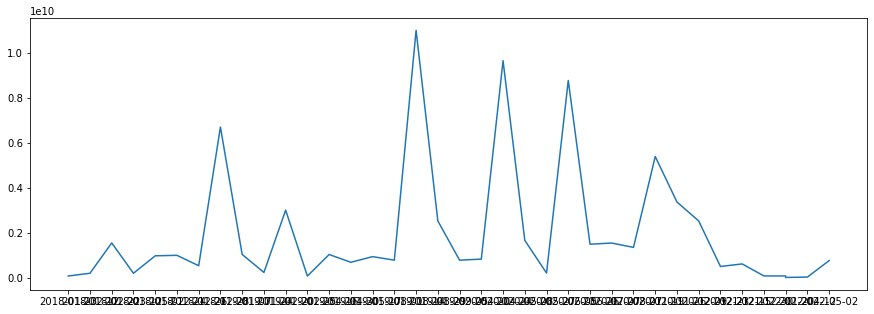

In [488]:
x1 = df_abpro['상장(예정)일']
y1 = df_abpro['총액']
plt.figure(figsize=(15,5))
plt.plot(x1, y1)

In [489]:
df_kq[df_kq['Name']=='에이비프로바이오']

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
5110,195990,KOSDAQ,에이비프로바이오,특수 목적용 기계 제조업,소형 머시닝센터,2015-04-13,12월,"양진상,IAN CHAN",http://www.abprobio.co.kr,대구광역시


In [634]:
# 시가총액
df_mc500[df_mc500['회사코드']=='195990']

,회사코드,시가총액


<AxesSubplot:xlabel='Date'>

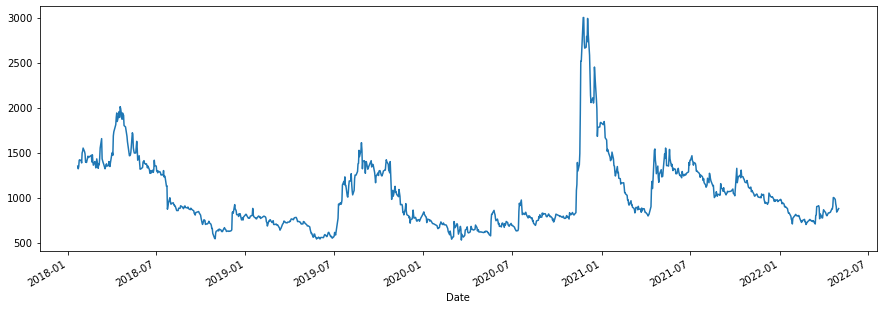

In [495]:
# 주가확인
fdr.DataReader('195990','2018-01-20','2022-05-02')['Close'].plot(figsize=(15,5))

<AxesSubplot:xlabel='Date'>

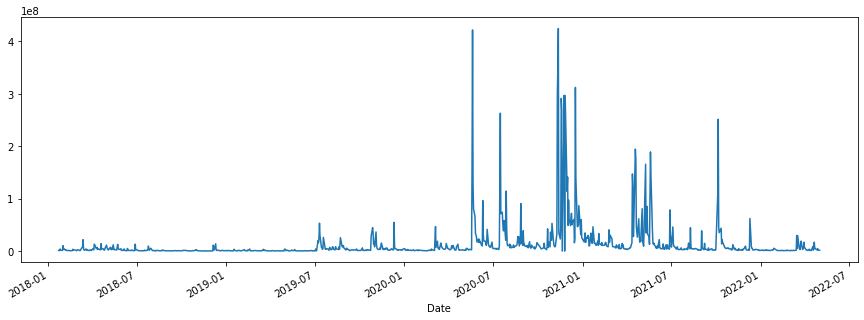

In [496]:
# 거래량
fdr.DataReader('195990','2018-01-20','2022-05-02')['Volume'].plot(figsize=(15,5))

In [607]:
# 주가변동성 보기
df_abpro_p = fdr.DataReader('195990','2018-01-20','2022-05-02')
df_abpro_p[df_abpro_p['Change']>0.2]

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2018-12-05,635,835,631,835,11256756,0.298600
2019-07-11,890,1000,852,928,53249532,0.205195
2020-03-04,565,734,565,734,25403131,0.299115
2020-05-19,720,747,630,747,164456993,0.299130
2020-07-15,847,847,766,847,128199980,0.299080
2020-11-10,853,1080,835,1080,299192793,0.296519
2020-11-12,1250,1460,1155,1390,424589569,0.213974
2020-11-18,1730,1935,1585,1935,291354377,0.298658
2020-11-19,2035,2515,2030,2515,268356706,0.299742


#### 에이루트

In [675]:
df_aroot = df_cb[df_cb['회사명']=='에이루트']
df_aroot = df_aroot.sort_values(by='상장(예정)일',ascending=True)
print(df_aroot.head())
print(df_aroot.tail())
print("전환사채발행횟수 :", len(df_aroot))

     회사명    상장(예정)일  상장방식       발행주식수    액면가          발행사유            총액
8   에이루트 2017-02-20  추가상장   7440475.0  100.0  국내사모 전환사채 전환  7.440475e+08
14  에이루트 2017-04-26  추가상장  15673978.0  100.0  국내사모 전환사채 전환  1.567398e+09
14  에이루트 2018-02-09  추가상장   5548993.0  100.0  국내사모 전환사채 전환  5.548993e+08
2   에이루트 2018-02-20  추가상장    732168.0  100.0  국내사모 전환사채 전환  7.321680e+07
8   에이루트 2018-05-18  추가상장   1345755.0  100.0  국내사모 전환사채 전환  1.345755e+08
     회사명    상장(예정)일  상장방식       발행주식수    액면가          발행사유            총액
11  에이루트 2021-07-27  추가상장   5707065.0  500.0  국내사모 전환사채 전환  2.853532e+09
7   에이루트 2021-07-30  추가상장    690214.0  500.0  국내사모 전환사채 전환  3.451070e+08
6   에이루트 2021-08-12  추가상장  32556087.0  500.0  국내사모 전환사채 전환  1.627804e+10
11  에이루트 2021-10-05  추가상장   2531645.0  500.0  국내사모 전환사채 전환  1.265822e+09
7   에이루트 2022-01-18  추가상장   7926654.0  500.0  국내사모 전환사채 전환  3.963327e+09
전환사채발행횟수 : 31


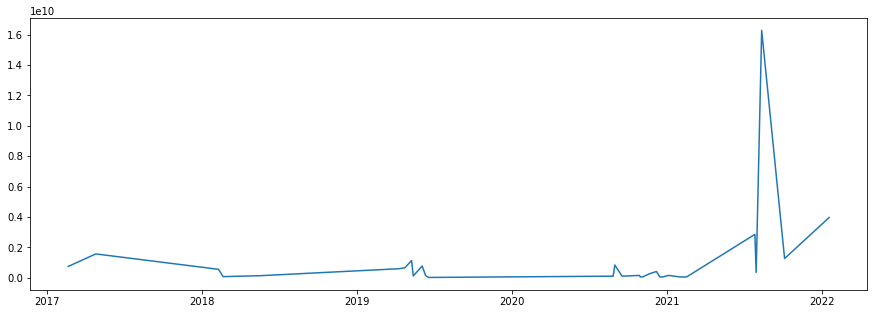

In [618]:
x1 = df_aroot['상장(예정)일']
y1 = df_aroot['총액']
plt.figure(figsize=(15,5))
plt.plot(x1, y1)

In [629]:
df_kq[df_kq['Name']=='에이루트']['Symbol'].iloc[0]

'096690'

<AxesSubplot:xlabel='Date'>

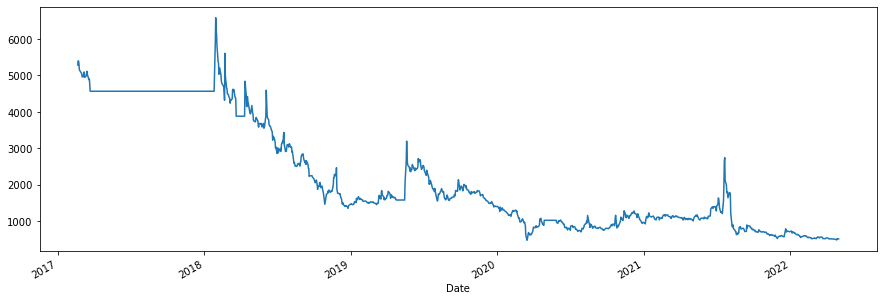

In [632]:
# 주가확인
df_aroot_p = fdr.DataReader('096690','2017-02-20','2022-05-02')
df_aroot_p['Close'].plot(figsize=(15,5))

<AxesSubplot:xlabel='Date'>

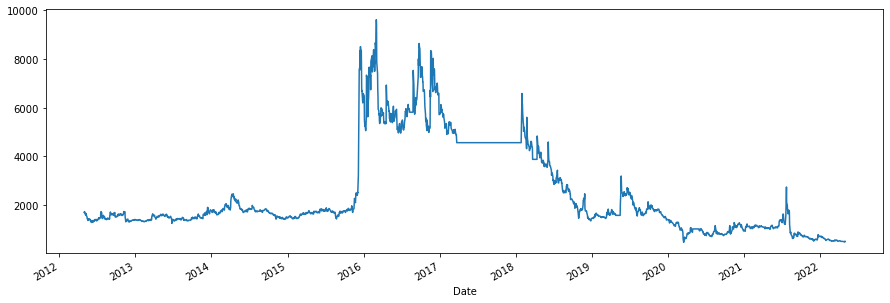

In [633]:
df_aroot_p1 = fdr.DataReader('096690','2012-04-30','2022-04-30')
df_aroot_p1['Close'].plot(figsize=(15,5))

#### ES큐브(탈락)

In [668]:
df_es = df_cb[df_cb['회사명']=='ES큐브']
df_es = df_es.sort_values(by='상장(예정)일',ascending=True)
print(df_es.head())
print(df_es.tail())

     회사명    상장(예정)일  상장방식      발행주식수    액면가          발행사유           총액
4   ES큐브 2006-06-05  추가상장   269926.0  500.0  해외공모 전환사채 전환  134963000.0
2   ES큐브 2006-06-21  추가상장   539853.0  500.0  해외공모 전환사채 전환  269926500.0
14  ES큐브 2006-07-31  추가상장   157701.0  500.0  해외공모 전환사채 전환   78850500.0
3   ES큐브 2006-12-22  추가상장   159747.0  500.0  해외공모 전환사채 전환   79873500.0
9   ES큐브 2019-05-27  추가상장  1038421.0  500.0  국내사모 전환사채 전환  519210500.0
     회사명    상장(예정)일  상장방식       발행주식수    액면가          발행사유            총액
3   ES큐브 2019-05-28  추가상장   1038421.0  500.0  국내사모 전환사채 전환  5.192105e+08
5   ES큐브 2020-01-10  추가상장    311526.0  500.0  국내사모 전환사채 전환  1.557630e+08
14  ES큐브 2020-06-25  추가상장    207684.0  500.0  국내사모 전환사채 전환  1.038420e+08
11  ES큐브 2020-07-24  추가상장  26626317.0  500.0  국내사모 전환사채 전환  1.331316e+10
5   ES큐브 2020-07-30  추가상장  25718608.0  500.0  국내사모 전환사채 전환  1.285930e+10


In [669]:
len(df_es)

10

In [670]:
df_es

,회사명,상장(예정)일,상장방식,발행주식수,액면가,발행사유,총액
4,ES큐브,2006-06-05,추가상장,269926.0,500.0,해외공모 전환사채 전환,1.349630e+08
2,ES큐브,2006-06-21,추가상장,539853.0,500.0,해외공모 전환사채 전환,2.699265e+08
14,ES큐브,2006-07-31,추가상장,157701.0,500.0,해외공모 전환사채 전환,7.885050e+07
3,ES큐브,2006-12-22,추가상장,159747.0,500.0,해외공모 전환사채 전환,7.987350e+07
9,ES큐브,2019-05-27,추가상장,1038421.0,500.0,국내사모 전환사채 전환,5.192105e+08
3,ES큐브,2019-05-28,추가상장,1038421.0,500.0,국내사모 전환사채 전환,5.192105e+08
5,ES큐브,2020-01-10,추가상장,311526.0,500.0,국내사모 전환사채 전환,1.557630e+08
14,ES큐브,2020-06-25,추가상장,207684.0,500.0,국내사모 전환사채 전환,1.038420e+08
11,ES큐브,2020-07-24,추가상장,26626317.0,500.0,국내사모 전환사채 전환,1.331316e+10
5,ES큐브,2020-07-30,추가상장,25718608.0,500.0,국내사모 전환사채 전환,1.285930e+10


#### 대성엘텍(탈락)

In [672]:
df_ds = df_cb[df_cb['회사명']=='대성엘텍']
df_ds = df_ds.sort_values(by='상장(예정)일',ascending=True)
print(df_ds.head())
print(df_ds.tail())
print("전환사채발행횟수 :", len(df_ds))

    회사명    상장(예정)일  상장방식       발행주식수    액면가          발행사유            총액
5  대성엘텍 2016-09-23  추가상장  30357142.0  500.0  국내사모 전환사채 전환  1.517857e+10
    회사명    상장(예정)일  상장방식       발행주식수    액면가          발행사유            총액
5  대성엘텍 2016-09-23  추가상장  30357142.0  500.0  국내사모 전환사채 전환  1.517857e+10
전환사채발행횟수 : 1


#### 와이오엠

In [674]:
df_yom = df_cb[df_cb['회사명']=='와이오엠']
df_yom = df_yom.sort_values(by='상장(예정)일',ascending=True)
print(df_yom.head())
print(df_yom.tail())
print("전환사채발행횟수 :", len(df_yom))

     회사명    상장(예정)일  상장방식       발행주식수    액면가          발행사유            총액
4   와이오엠 2006-11-30  추가상장   1612900.0  500.0  국내사모 전환사채 전환  8.064500e+08
9   와이오엠 2007-04-20  추가상장   1003200.0  500.0  국내사모 전환사채 전환  5.016000e+08
12  와이오엠 2007-05-15  추가상장  25396800.0  500.0  국내사모 전환사채 전환  1.269840e+10
8   와이오엠 2007-10-17  추가상장     47127.0  500.0  국내공모 전환사채 전환  2.356350e+07
5   와이오엠 2007-10-25  추가상장     58910.0  500.0  국내공모 전환사채 전환  2.945500e+07
     회사명    상장(예정)일  상장방식     발행주식수    액면가          발행사유           총액
9   와이오엠 2019-11-15  추가상장  431578.0  500.0  국내사모 전환사채 전환  215789000.0
3   와이오엠 2019-11-29  추가상장  137230.0  500.0  국내사모 전환사채 전환   68615000.0
0   와이오엠 2019-12-20  추가상장  164676.0  500.0  국내사모 전환사채 전환   82338000.0
10  와이오엠 2019-12-27  추가상장  178399.0  500.0  국내사모 전환사채 전환   89199500.0
1   와이오엠 2020-01-03  추가상장  960614.0  500.0  국내사모 전환사채 전환  480307000.0
전환사채발행횟수 : 40


In [676]:
df_yom

,회사명,상장(예정)일,상장방식,발행주식수,액면가,발행사유,총액
4,와이오엠,2006-11-30,추가상장,1612900.0,500.0,국내사모 전환사채 전환,8.064500e+08
9,와이오엠,2007-04-20,추가상장,1003200.0,500.0,국내사모 전환사채 전환,5.016000e+08
12,와이오엠,2007-05-15,추가상장,25396800.0,500.0,국내사모 전환사채 전환,1.269840e+10
8,와이오엠,2007-10-17,추가상장,47127.0,500.0,국내공모 전환사채 전환,2.356350e+07
5,와이오엠,2007-10-25,추가상장,58910.0,500.0,국내공모 전환사채 전환,2.945500e+07
2,와이오엠,2008-01-28,추가상장,26000.0,500.0,국내공모 전환사채 전환,1.300000e+07
13,와이오엠,2008-09-11,추가상장,50.0,1000.0,국내공모 전환사채 전환,5.000000e+04
4,와이오엠,2008-12-10,추가상장,429429.0,1000.0,국내공모 전환사채 전환,4.294290e+08
3,와이오엠,2009-01-23,추가상장,50000.0,1000.0,국내사모 전환사채 전환,5.000000e+07
5,와이오엠,2009-02-26,추가상장,550000.0,1000.0,국내사모 전환사채 전환,5.500000e+08


 ## 유상증자

* 주주배정 : 기존 주주에게 신주 인수권을 준 뒤 해당 주주가 청약서에 서명해 투자금을 납입하는 방식<br>
<br>
* 제3자배정 : 특정 투자자를 대상으로 신주를 발행, 제3자가 청약서에 서명한 후 투자금을 납입하는 방식<br>
1)일반공모에 비해 유상증자 성공가능성이 높기 때문에 주가에 호재로 작용하는 경우 많음<br>
2)다만 이를 악용해 주가 올랐을 때 돌연 철회하는 경우 있음<br>
<br>
* 일반공모 : 신주인수권을 배제하고 불특정 다수를 대상으로 신주를 발행하는 방식<br> 
1) 신뢰를 잃은 기업이 진행 <- 기존 주주가 청약에 응하지 않을 것 같을때 선택<br>
2) 발행가액은 기준가의 30%까지 할인할 수 있다<br>
3) 세력이 유상증자에 참여하여 주가를 유지시키기만 하면 30% 수익을 먹는 구조

--> 제3자배정,일반공모만 세력파악에 사용

In [550]:
df_ci = df_kind[df_kind['발행사유'].str.contains('유상증자')]
df_ci

,회사명,상장(예정)일,상장방식,발행주식수,액면가,발행사유
1,KH 전자,2022-05-03,추가상장,5783867.0,500.0,유상증자(제3자배정)
14,에스디시스템,2022-04-29,추가상장,1538460.0,500.0,유상증자(제3자배정)
11,상상인제3호스팩,2022-04-29,신규상장,5310000.0,100.0,유상증자
14,신한제9호스팩,2022-04-27,신규상장,4535000.0,100.0,유상증자
6,맥스트,2022-04-26,추가상장,1111950.0,500.0,유상증자(구주주배정)
...,...,...,...,...,...,...
11,제이엠아이,1999-04-06,추가상장,357143.0,5000,유상증자
1,피델릭스,1999-03-11,추가상장,416667.0,5000,유상증자
14,대양제지,1999-01-18,추가상장,400000.0,5000,유상증자
1,원익큐브,1999-01-15,추가상장,90000.0,5000,유상증자


In [561]:
df_ci['발행사유'].unique()

array(['유상증자(제3자배정)', '유상증자', '유상증자(구주주배정)', '유상증자(일반공모)', '유상증자(출자전환)',
       '유상증자(현물출자)', '유상증자(흡수합병)', '유상증자(해외DR발행)'], dtype=object)

In [551]:
df_ci.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3743 entries, 1 to 4
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   회사명      3743 non-null   object        
 1   상장(예정)일  3743 non-null   datetime64[ns]
 2   상장방식     3743 non-null   object        
 3   발행주식수    3743 non-null   float64       
 4   액면가      3743 non-null   object        
 5   발행사유     3743 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 204.7+ KB


In [554]:
df_ci.set_index('상장(예정)일', inplace=True)

### 유상증자 구분필요(제3자, 일반공모 등)

In [560]:
df_ci['회사명'].value_counts()[:20]

대한그린파워     38
와이오엠       35
바이온        31
메디콕스       29
한국테크놀로지    28
BNGT       26
코드네이처      24
바른손이앤에이    24
큐로홀딩스      23
KD         23
소니드        23
CNT85      22
휴먼엔        22
HLB        22
골드퍼시픽      22
셀루메드       22
초록뱀미디어     21
제이웨이       21
UCI        21
아이톡시       20
Name: 회사명, dtype: int64

In [564]:
df_ci['회사명'].value_counts()[:20].index

Index(['대한그린파워', '와이오엠', '바이온', '메디콕스', '한국테크놀로지', 'BNGT', '코드네이처', '바른손이앤에이',
       '큐로홀딩스', 'KD', '소니드', 'CNT85', '휴먼엔', 'HLB', '골드퍼시픽', '셀루메드', '초록뱀미디어',
       '제이웨이', 'UCI', '아이톡시'],
      dtype='object')